<a href="https://colab.research.google.com/github/lazy-wolf/Sample/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image
import tensorflow_datasets as tfds

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
image_shape = (128,128)

In [ ]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2")
])
m.build([None, 128, 128, 3])

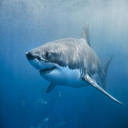

In [ ]:
shark_fish = Image.open('./image.jpg').resize(image_shape)
shark_fish

In [ ]:
# Normalizing
shark_fish = np.array(shark_fish)/255.0
shark_fish.shape

(128, 128, 3)

In [ ]:
shark = shark_fish[np.newaxis,...]

In [ ]:
shark.shape

(1, 128, 128, 3)

In [ ]:
prediction = m.predict(shark)
prediction.shape

1/1 [==============================] - 0s 86ms/step


(1, 1001)

In [ ]:
prediction_label_index = np.argmax(prediction)
prediction_label_index

3

In [ ]:
image_labels = []
with open ("./ImageNetlabels.txt", "r") as file:
  image_labels = file.read().splitlines()
image_labels[:6]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead']

In [ ]:
image_labels[prediction_label_index]

'great white shark'

In [ ]:
# tfds.list_builders()

In [ ]:
ds, info = tfds.load('horses_or_humans', shuffle_files=True, with_info=True)

2023-10-19 15:46:16.054614: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]
Generating train examples...:   0%|             | 0/1027 [00:00<?, ? examples/s]
                                                                                
Shuffling /Users/aashishmamgain/tensorflow_datasets/horses_or_humans/3.0.0.incom
Shuffling /Users/aashishmamgain/tensorflow_datasets/horses_or_humans/3.0.0.incom
Generating test examples...:   0%|               | 0/256 [00:00<?, ? examples/s]
                                                                                
Shuffling /Users/aashishmamgain/tensorflow_datasets/horses_or_humans/3.0.0.incom


Dataset horses_or_humans downloaded and prepared to /Users/aashishmamgain/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [ ]:
train, test = ds['train'], ds['test']

In [ ]:
train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
train_X = np.asarray(list(map(lambda x: x['image'], tfds.as_numpy(train))))
train_Y = np.asarray(list(map(lambda x: x['label'], tfds.as_numpy(train))))

In [ ]:
test_X = np.asarray(list(map(lambda x: x['image'], tfds.as_numpy(test))))
test_Y = np.asarray(list(map(lambda x: x['label'], tfds.as_numpy(test))))

In [ ]:
test_X.shape

(256, 300, 300, 3)

In [ ]:
train_Y.shape

(1027,)

In [ ]:
x_train = np.resize(train_X,((1027,128, 128, 3)))
x_test = np.resize(train_X,((256,128, 128, 3)))

In [ ]:
x_test.shape

(256, 128, 128, 3)

In [ ]:
x_train_nor = x_train / 255
x_test_nor = x_test / 255

In [1]:
plt.axis('off')
plt.imshow(train_X[45]);

NameError: ignored

In [ ]:
class_labels = 2
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"),
    tf.keras.layers.Dense(class_labels)
])
m.build([None, 128, 128, 3])

In [ ]:

m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 1694493 (6.46 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


In [ ]:
m.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc'])
m.fit(x_train_nor, train_Y, epochs =25)

Epoch 1/25
33/33 [==============================] - 1s 24ms/step - loss: 0.7479 - acc: 0.5209
Epoch 2/25
33/33 [==============================] - 1s 24ms/step - loss: 0.6994 - acc: 0.5492
Epoch 3/25
33/33 [==============================] - 1s 24ms/step - loss: 0.7020 - acc: 0.5424
Epoch 4/25
33/33 [==============================] - 1s 23ms/step - loss: 0.6861 - acc: 0.5784
Epoch 5/25
33/33 [==============================] - 1s 25ms/step - loss: 0.6952 - acc: 0.5725
Epoch 6/25
33/33 [==============================] - 1s 24ms/step - loss: 0.6755 - acc: 0.5852
Epoch 7/25
33/33 [==============================] - 1s 24ms/step - loss: 0.6747 - acc: 0.5930
Epoch 8/25
33/33 [==============================] - 1s 24ms/step - loss: 0.6727 - acc: 0.5803
Epoch 9/25
33/33 [==============================] - 1s 24ms/step - loss: 0.6646 - acc: 0.6018
Epoch 10/25
33/33 [==============================] - 1s 25ms/step - loss: 0.6963 - acc: 0.5745
Epoch 11/25
33/33 [==============================] - 1s 24m

In [ ]:
image = x_test_nor[0].reshape(1,128, 128, 3)

In [ ]:
output = np.argmax(m.predict(image))

1/1 [==============================] - 0s 14ms/step


In [ ]:
classes = {0:'horse',1:'person'}
predict = classes[output]
print(predict)

horse


In [2]:
plt.axis('off')
plt.imshow(test_X[1])

NameError: ignored